<a href="https://colab.research.google.com/github/swaroopkasaraneni/AI/blob/main/AnalyzingSentenceCase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home)This is a dataset having tweets about 6 US Airlines along with their sentiments: positive, negative and neutral.You are provided with this dataset named “Tweets.csv”.

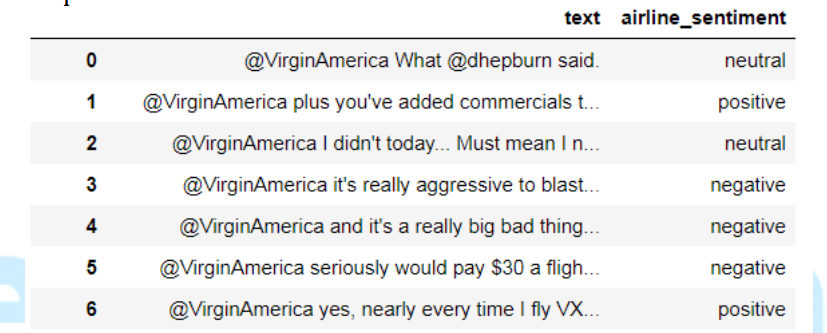

1. Retrieve all tags starting from ‘@’ in the entire dataset and save in a file called “References.txt”



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")

print("Path to dataset files:", path)

100%|██████████| 2.55M/2.55M [00:00<00:00, 63.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/crowdflower/twitter-airline-sentiment/versions/4


In [2]:
import pandas as pd
import re

df = pd.read_csv(path + "/Tweets.csv")
print(df.head())


tags = []
for tweet in df['text']:
    # Find all occurrences of '@' followed by word
    found_tags = re.findall(r'@\w+', tweet)
    tags.extend(found_tags)

# Remove duplicates by converting the list to a set
unique_tags = set(tags)

with open('References.txt', 'w') as f:
    for tag in unique_tags:
        f.write(tag + '\n')

print(f"Found {len(unique_tags)} unique tags. Saved to 'References.txt'.")


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

2. Extract all noun phrases from their dataset and save them in different lines in a file named “Noun Phrasesfor <airline_sentiment> Review .txt” (You can choose your own grammar for noun phrase).Here <airline_sentiment> will have 3 different values: positive, negative and neutral so 3 files will be created.


In [3]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

# Group the dataset by sentiment
sentiments = ["positive", "negative", "neutral"]

for sentiment in sentiments:
    # Filter tweets for the specific sentiment
    filtered_tweets = df[df['airline_sentiment'] == sentiment]['text']

    noun_phrases = []

    # Extract noun phrases
    for tweet in filtered_tweets:
        doc = nlp(tweet)
        for np in doc.noun_chunks:
            noun_phrases.append(np.text)

    # Save the noun phrases in a text file
    filename = f"Noun Phrases for {sentiment} Review.txt"
    with open(filename, "w") as f:
        for phrase in noun_phrases:
            f.write(phrase + "\n")

    print(f"Saved noun phrases for {sentiment} sentiment in '{filename}'.")


Saved noun phrases for positive sentiment in 'Noun Phrases for positive Review.txt'.
Saved noun phrases for negative sentiment in 'Noun Phrases for negative Review.txt'.
Saved noun phrases for neutral sentiment in 'Noun Phrases for neutral Review.txt'.


3. Extract all verb phrases from their dataset and save them in different lines in a file named “Verb Phrases for <airline_sentiment> Review .txt”” (You can choose your own grammar for noun phrase).Here <airline_sentiment> will have 3 different values: positive , negative and neutral so 3 files will be created

In [5]:
import pandas as pd
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")

def extract_verb_phrases(doc):
    matcher = Matcher(nlp.vocab)

    # Define a pattern for verb phrases: Verb followed by optional Adverb and/or Adjective
    pattern = [
        {"POS": "VERB"},
        {"POS": "ADV", "OP": "*"},
        {"POS": "ADJ", "OP": "*"}
    ]
    matcher.add("VerbPhrase", [pattern])
    matches = matcher(doc)
    verb_phrases = [doc[start:end].text for match_id, start, end in matches]
    return verb_phrases


# Group the dataset by sentiment
sentiments = ["positive", "negative", "neutral"]

for sentiment in sentiments:
    # Filter tweets for the specific sentiment
    filtered_tweets = df[df['airline_sentiment'] == sentiment]['text']

    verb_phrases = []

    # Extract verb phrases
    for tweet in filtered_tweets:
        doc = nlp(tweet)
        verb_phrases.extend(extract_verb_phrases(doc))

    # Save the verb phrases in a text file
    filename = f"Verb Phrases for {sentiment} Review.txt"
    with open(filename, "w") as f:
        for phrase in verb_phrases:
            f.write(phrase + "\n")

    print(f"Saved verb phrases for {sentiment} sentiment in '{filename}'.")


Saved verb phrases for positive sentiment in 'Verb Phrases for positive Review.txt'.
Saved verb phrases for negative sentiment in 'Verb Phrases for negative Review.txt'.
Saved verb phrases for neutral sentiment in 'Verb Phrases for neutral Review.txt'.



4. For each sentiment, make a well labelled pie chart showing distribution of Noun Phrases and Verb Phrasesof that sentimentfrom the data set. Use the above created files to get the frequencies.

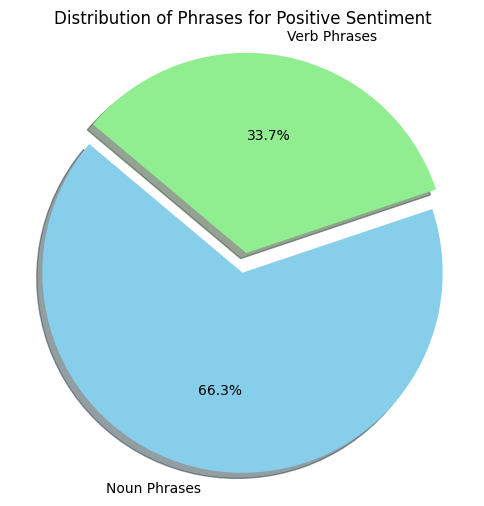

Pie chart saved for positive sentiment.


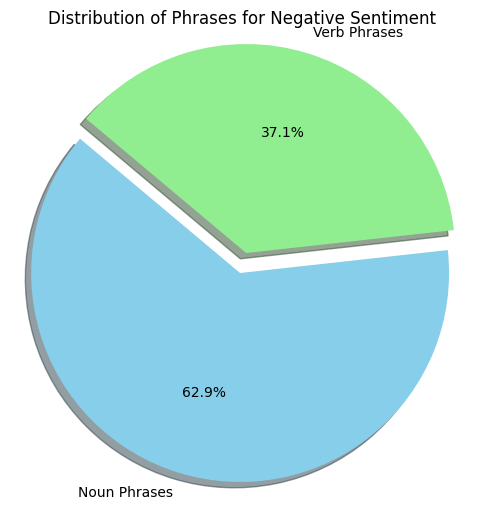

Pie chart saved for negative sentiment.


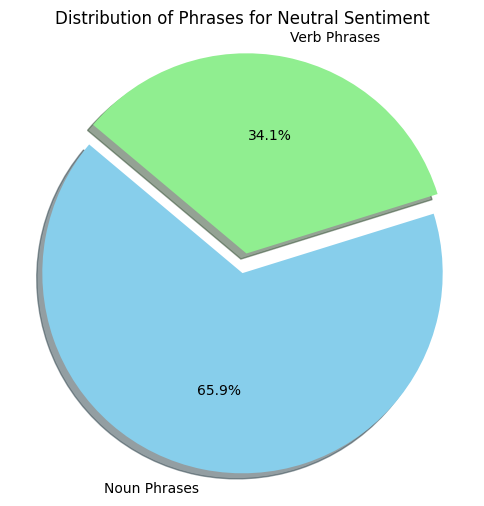

Pie chart saved for neutral sentiment.


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to read phrases from file and count frequencies
def get_phrase_counts(filename):
    with open(filename, "r") as f:
        phrases = f.readlines()
    # Count the frequency of phrases
    return Counter(phrases)

# Function to create and save pie charts
def create_pie_chart(sentiment, noun_count, verb_count):
    labels = ['Noun Phrases', 'Verb Phrases']
    sizes = [noun_count, verb_count]
    colors = ['skyblue', 'lightgreen']
    explode = (0.1, 0)  # Highlight the first slice

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"Distribution of Phrases for {sentiment.capitalize()} Sentiment")
    plt.axis('equal')
    plt.savefig(f"PhraseDistribution_{sentiment.capitalize()}.png")
    plt.show()

# List of sentiments
sentiments = ["positive", "negative", "neutral"]

for sentiment in sentiments:
    # Read noun and verb phrases for the sentiment
    noun_file = f"Noun Phrases for {sentiment} Review.txt"
    verb_file = f"Verb Phrases for {sentiment} Review.txt"

    # Get phrase counts
    noun_counts = get_phrase_counts(noun_file)
    verb_counts = get_phrase_counts(verb_file)

    # Calculate total counts
    total_noun_phrases = sum(noun_counts.values())
    total_verb_phrases = sum(verb_counts.values())

    # Create pie chart
    create_pie_chart(sentiment, total_noun_phrases, total_verb_phrases)

    print(f"Pie chart saved for {sentiment} sentiment.")
